# Challenge 1

In this challenge you will be working on **Pokemon**. You will answer a series of questions in order to practice dataframe calculation, aggregation, and transformation.

![Pokemon](../images/pokemon.jpg)

Follow the instructions below and enter your code.

#### Import all required libraries.

In [1]:
# import libraries
#import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import re


#### Import data set.

Import data set `Pokemon` from Ironhack's database. Read the data into a dataframe called `pokemon`.

*Data set attributed to [Alberto Barradas](https://www.kaggle.com/abcsds/pokemon/)*

In [2]:
# import data set from Ironhack's database
pokemon = pd.read_csv('/Users/erinberardi/Erin_dataV2-labs/module-2/Two-Sample-Hypothesis-Tests/Pokemon.csv')

#### Print first 10 rows of `pokemon`.

In [3]:
# your code here
pokemon.head(10)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


When you look at a data set, you often wonder what each column means. Some open-source data sets provide descriptions of the data set. In many cases, data descriptions are extremely useful for data analysts to perform work efficiently and successfully.

For the `Pokemon.csv` data set, fortunately, the owner provided descriptions which you can see [here](https://www.kaggle.com/abcsds/pokemon/home). For your convenience, we are including the descriptions below. Read the descriptions and understand what each column means. This knowledge is helpful in your work with the data.

| Column | Description |
| --- | --- |
| # | ID for each pokemon |
| Name | Name of each pokemon |
| Type 1 | Each pokemon has a type, this determines weakness/resistance to attacks |
| Type 2 | Some pokemon are dual type and have 2 |
| Total | A general guide to how strong a pokemon is |
| HP | Hit points, or health, defines how much damage a pokemon can withstand before fainting |
| Attack | The base modifier for normal attacks (eg. Scratch, Punch) |
| Defense | The base damage resistance against normal attacks |
| SP Atk | Special attack, the base modifier for special attacks (e.g. fire blast, bubble beam) |
| SP Def | The base damage resistance against special attacks |
| Speed | Determines which pokemon attacks first each round |
| Generation | Number of generation |
| Legendary | True if Legendary Pokemon False if not |

#### Obtain the distinct values across `Type 1` and `Type 2`.

Exctract all the values in `Type 1` and `Type 2`. Then create an array containing the distinct values across both fields.

In [4]:
# your code here
print(len(pokemon))
select_columns = ['Type 1','Type 2']
types = pokemon[select_columns].drop_duplicates()
print(types)
pokemon.head()

800
      Type 1  Type 2
0      Grass  Poison
4       Fire     NaN
6       Fire  Flying
7       Fire  Dragon
9      Water     NaN
..       ...     ...
778    Ghost   Grass
790   Flying  Dragon
797  Psychic   Ghost
798  Psychic    Dark
799     Fire   Water

[154 rows x 2 columns]


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### Cleanup `Name` that contain "Mega".

If you have checked out the pokemon names carefully enough, you should have found there are junk texts in the pokemon names which contain "Mega". We want to clean up the pokemon names. For instance, "VenusaurMega Venusaur" should be "Mega Venusaur", and "CharizardMega Charizard X" should be "Mega Charizard X".

In [5]:
# Clara

def clean(x):
    if 'Mega' in x:
        change= x.split('Mega')[1]
        name= 'Mega'+ change
        return name
    else:
        return x

pokemon['Name']=pokemon['Name'].apply(clean)
    
#test transformed data
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


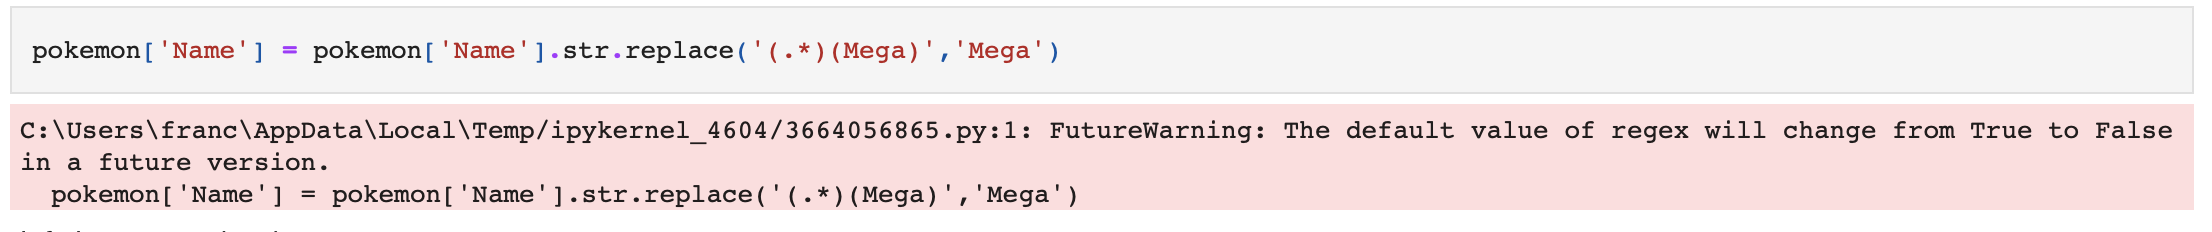

In [6]:
# your code here


non_mega = pokemon["Name"].str.replace(".*(?=Mega)", "")
non_mega.head(10)

pokemon['Name'] = non_mega 
pokemon.head(10)

# test transformed data
#pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


#### Create a new column called `A/D Ratio` whose value equals to `Attack` devided by `Defense`.

For instance, if a pokemon has the Attack score 49 and Defense score 49, the corresponding `A/D Ratio` is 49/49=1.

In [7]:
# your code here
#pokemon.head()
pokemon['A/D Ratio'] = (pokemon['Attack']/pokemon['Defense'])
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1.000000
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.984127
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.987952
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.813008
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1.209302


#### Identify the pokemon with the highest `A/D Ratio`.

In [10]:
# your code here
pokemon['A/D Ratio'].max()


pokemon[pokemon['A/D Ratio']==pokemon['A/D Ratio'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,9.0


#### Identify the pokemon with the lowest A/D Ratio.

In [11]:
# your code here
pokemon[pokemon['A/D Ratio']==pokemon['A/D Ratio'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,0.043478


#### Create a new column called `Combo Type` whose value combines `Type 1` and `Type 2`.

Rules:

* If both `Type 1` and `Type 2` have valid values, the `Combo Type` value should contain both values in the form of `<Type 1> <Type 2>`. For example, if `Type 1` value is `Grass` and `Type 2` value is `Poison`, `Combo Type` will be `Grass-Poison`.

* If `Type 1` has valid value but `Type 2` is not, `Combo Type` will be the same as `Type 1`. For example, if `Type 1` is `Fire` whereas `Type 2` is `NaN`, `Combo Type` will be `Fire`.

# Creating Combo Type

In [12]:
# Clara
pokemon['Combo Type'] = np.where(pokemon['Type 2'].isna(), pokemon['Type 1'], pokemon['Type 1']+'-'+pokemon['Type 2'])

pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio,Combo Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1.000000,Grass-Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.984127,Grass-Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.987952,Grass-Poison
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.813008,Grass-Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1.209302,Fire


In [14]:
# Miguel and Phillip
pokemon['Combo Type2'] = pokemon['Type 1'] + ('-' + pokemon['Type 2']).fillna('')

In [15]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio,Combo Type,Combo Type2
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1.000000,Grass-Poison,Grass-Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.984127,Grass-Poison,Grass-Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.987952,Grass-Poison,Grass-Poison
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.813008,Grass-Poison,Grass-Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1.209302,Fire,Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,0.666667,Rock-Fairy,Rock-Fairy
796,719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,1.454545,Rock-Fairy,Rock-Fairy
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,1.833333,Psychic-Ghost,Psychic-Ghost
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,2.666667,Psychic-Dark,Psychic-Dark


In [16]:
def combo_type_def(row):
    type_1 = row['Type 1']
    type_2 = row['Type 2']

    if str(type_2) == 'nan':
        return type_1 
    
    else:
        return type_1 +'-'+ type_2
    
pokemon['combo_type3'] = pokemon.apply(combo_type_def, axis=1)

pokemon.head(20)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio,Combo Type,Combo Type2,combo_type3
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1.000000,Grass-Poison,Grass-Poison,Grass-Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.984127,Grass-Poison,Grass-Poison,Grass-Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.987952,Grass-Poison,Grass-Poison,Grass-Poison
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.813008,Grass-Poison,Grass-Poison,Grass-Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1.209302,Fire,Fire,Fire
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,1.103448,Fire,Fire,Fire
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,1.076923,Fire-Flying,Fire-Flying,Fire-Flying
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,1.171171,Fire-Dragon,Fire-Dragon,Fire-Dragon
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,1.333333,Fire-Flying,Fire-Flying,Fire-Flying
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,0.738462,Water,Water,Water


#### Identify the pokemon whose `A/D Ratio` are among the top 5.

In [17]:
# your code here
#pokemon[pokemon['A/D Ratio']==pokemon['A/D Ratio'].max()]
pokemon_sort =pokemon.sort_values(by=['A/D Ratio'], ascending=False) 
pokemon_sort.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio,Combo Type,Combo Type2,combo_type3
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,9.000,Psychic,Psychic,Psychic
347,318,Carvanha,Water,Dark,305,45,90,20,65,20,65,3,False,4.500,Water-Dark,Water-Dark,Water-Dark
19,15,Mega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,3.750,Bug-Poison,Bug-Poison,Bug-Poison
453,408,Cranidos,Rock,NaN,350,67,125,40,30,30,58,4,False,3.125,Rock,Rock,Rock
348,319,Sharpedo,Water,Dark,460,70,120,40,95,40,95,3,False,3.000,Water-Dark,Water-Dark,Water-Dark


#### For the 5 pokemon printed above, aggregate `Combo Type` and use a list to store the unique values.

Your end product is a list containing the distinct `Combo Type` values of the 5 pokemon with the highest `A/D Ratio`.

In [18]:
# your code here. Getting list of column names
#combo_types = 
N = 5
# Select first N column
ct = pokemon_sort.iloc[0:5]
combo_types = ct['Combo Type']
lst_combotypes = list(combo_types)
lst_combotypes

['Psychic', 'Water-Dark', 'Bug-Poison', 'Rock', 'Water-Dark']

#### For each of the `Combo Type` values obtained from the previous question, calculate the mean scores of all numeric fields across all pokemon.

Your output should look like below:

![Aggregate](../images/aggregated-mean.png)

In [19]:
# your code here
#p=pokemon_sort.set_index('Combo Type')


pmean = pokemon_sort.groupby('Combo Type').agg('mean').reset_index()


pmean[pmean['Combo Type'].isin(lst_combotypes)]



,Combo Type,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio
8,Bug-Poison,199.166667,347.916667,53.750000,68.333333,58.083333,42.500000,59.333333,65.916667,2.333333,0.000000,1.315989
109,Psychic,381.973684,464.552632,72.552632,64.947368,67.236842,98.552632,82.394737,78.868421,3.342105,0.236842,1.164196
117,Rock,410.111111,409.444444,67.111111,103.333333,107.222222,40.555556,58.333333,32.888889,3.888889,0.111111,1.260091
140,Water-Dark,347.666667,493.833333,69.166667,120.000000,65.166667,88.833333,63.500000,87.166667,3.166667,0.000000,2.291949


In [20]:
pmean

,Combo Type,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio
0,Bug,361.352941,289.705882,53.058824,50.352941,55.411765,39.294118,43.647059,47.941176,3.470588,0.0,0.940179
1,Bug-Electric,595.500000,395.500000,60.000000,62.000000,55.000000,77.000000,55.000000,86.500000,5.000000,0.0,1.111667
2,Bug-Fighting,214.000000,550.000000,80.000000,155.000000,95.000000,40.000000,100.000000,80.000000,2.000000,0.0,1.637681
3,Bug-Fire,636.500000,455.000000,70.000000,72.500000,60.000000,92.500000,80.000000,80.000000,5.000000,0.0,1.234266
4,Bug-Flying,286.285714,419.500000,63.000000,70.142857,61.571429,72.857143,69.071429,82.857143,2.857143,0.0,1.146274
...,...,...,...,...,...,...,...,...,...,...,...,...
149,Water-Ice,103.000000,511.666667,90.000000,83.333333,113.333333,80.000000,78.333333,66.666667,1.000000,0.0,0.821759
150,Water-Poison,118.666667,426.666667,61.666667,68.333333,58.333333,61.666667,91.666667,85.000000,1.333333,0.0,1.162149
151,Water-Psychic,111.800000,481.000000,87.000000,73.000000,104.000000,94.000000,79.000000,44.000000,1.200000,0.0,0.783668
152,Water-Rock,430.000000,428.750000,70.750000,82.750000,112.750000,61.500000,65.000000,36.000000,3.750000,0.0,0.727170
